### Here we compare the final clusterings and try to produce a single embedding in 2D that works well for plotting all.

## TODO: try tSNE? And add ARI.

In [6]:
import matplotlib.pyplot as plt
import pickle as pk
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import colorcet as cc
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
# from hdbscan.validity import validity_index

# from itertools import combinations
from matplotlib.colors import ListedColormap
# from sklearn.metrics import silhouette_score

from utilities import run_configs, load_symptom_data, modularity, clustering_similarity

%matplotlib inline

In [7]:
SEED = 42

In [8]:
symptom_data = load_symptom_data(run_configs[1]['data_path'])

In [9]:
chris_clusters = pd.read_csv('../clusterings/chris/lowdim_spectral_ensemble_50_kmeans_joint_criterion_alpha_0.5_n_clusters_8.csv', index_col=0)

In [10]:
# tessa_clusters = pd.read_csv('../clusterings/tessa/cluster_13_111023.csv', index_col=0)
tessa_clusters = pd.read_csv('../clusterings/tessa/cluster_stepmix_aggregate_010524.csv', index_col=0)

In [11]:
leo_clusters = pd.read_csv('../clusterings/leo/d2_pca_additive_hdbscan_sil_17_6031_with_ids.csv', index_col=0)
leo_clusters_2 = pd.read_csv('../clusterings/leo/d2_tsne_agg_opt_5_6031_with_ids.csv', index_col=0)

In [12]:
np.unique(leo_clusters.cluster, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 463,  196,  182,  557, 1255,  265,  193,  586,  212,  135,  128,
         266,  418,  235,  178,  354,  408]))

In [13]:
not_noise = leo_clusters[leo_clusters.cluster != -1].index

In [14]:
adjusted_mutual_info_score(
    chris_clusters.loc[not_noise].cluster,
    leo_clusters.loc[not_noise].cluster
)

0.2994556897369313

In [15]:
adjusted_mutual_info_score(
    tessa_clusters.loc[not_noise].cluster,
    leo_clusters.loc[not_noise].cluster
)

0.25961374039748936

In [16]:
adjusted_mutual_info_score(
    leo_clusters_2.loc[not_noise].cluster,
    leo_clusters.loc[not_noise].cluster
)

0.11899662370852883

In [21]:
adjusted_mutual_info_score(
    chris_clusters.cluster,
    tessa_clusters.cluster
)

0.40622182128627055

In [23]:
umap_param_space = {
    'n_components': [2], 
    'n_neighbors': list(range(2, 100)),
    'min_dist': np.arange(0, 1, 0.01),
    'metric': [
        'euclidean', 
        'manhattan',
        'hamming',
        'jaccard',
        'dice',
        'russellrao',
        'kulsinski',
        'rogerstanimoto',
        'sokalmichener',
        'sokalsneath',
        'yule'
    ]
}

In [25]:
params_both = {}
results_both = {}

for i in range(1000):
    print(i)
    params_both[i] = {
        key: np.random.choice(umap_param_space[key])
        for key in umap_param_space.keys()
    }
    
    reducer = umap.UMAP(**params_both[i], random_state=SEED)
    umap_embedding = reducer.fit_transform(symptom_data)
    
    st = silhouette_score(umap_embedding, tessa_clusters.cluster)
    sc = silhouette_score(umap_embedding, chris_clusters.cluster)
    sl = silhouette_score(umap_embedding, leo_clusters.cluster)
    slnn = silhouette_score(
        umap_embedding[leo_clusters.cluster!=-1, :], 
        leo_clusters.loc[not_noise].cluster
    )
    
    umap_embedding = umap_embedding.astype(np.double)
    vt = validity_index(umap_embedding, tessa_clusters.cluster)
    vc = validity_index(umap_embedding, chris_clusters.cluster)
    vl = validity_index(umap_embedding, leo_clusters.cluster)
    vlnn = validity_index(
        umap_embedding[leo_clusters.cluster!=-1, :], 
        leo_clusters.loc[not_noise].cluster
    )

    results_both[i] = {
        'silhouette_tessa': st,
        'silhouette_chris': sc,
        'silhouette_leo': sl,
        'silhouette_leo_notnoise': slnn,
        'silhouette_mean': (st + sc + sl) / 3,
        
        'dbcv_tessa': vt,
        'dbcv_chris': vc,
        'dbcv_leo': vl,
        'dbcv_leo_notnoise': vlnn,
        'dbcv_mean': (vt + vc + vl) / 3,
        'embedding': umap_embedding
    }
    print(results_both[i])

0
{'silhouette_tessa': -0.03116664, 'silhouette_chris': 0.28917557, 'silhouette_leo': -0.11631419, 'silhouette_leo_notnoise': -0.0850002, 'silhouette_mean': 0.04723157982031504, 'dbcv_tessa': -0.8134824327040651, 'dbcv_chris': -0.659936367020685, 'dbcv_leo': -0.7647332193472307, 'dbcv_leo_notnoise': -0.8283236432979796, 'dbcv_mean': -0.7460506730239936, 'embedding': array([[47.61105347,  5.15025663],
       [43.94516754,  4.24567223],
       [47.49709702,  5.59299803],
       ...,
       [43.49054337,  5.10250139],
       [50.60296631,  4.99372578],
       [45.29362488,  2.96970463]])}
1


/home/rustybilges/Documents/Work/PLRC/PLR/Chris/venv/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for sokalsneath distance metric; inverse_transform will be unavailable
  warn(


{'silhouette_tessa': 0.009828309, 'silhouette_chris': -0.021688176, 'silhouette_leo': -0.1649087, 'silhouette_leo_notnoise': -0.15087005, 'silhouette_mean': -0.05892285704612732, 'dbcv_tessa': -0.7607776776735822, 'dbcv_chris': -0.8102916753183154, 'dbcv_leo': -0.7829348936995946, 'dbcv_leo_notnoise': -0.8480388548675029, 'dbcv_mean': -0.7846680822304973, 'embedding': array([[19.69856644,  5.31188917],
       [21.91331482,  5.61029863],
       [20.26629639,  4.54960155],
       ...,
       [23.17551613,  4.49182796],
       [19.59145927,  5.99628878],
       [21.2671299 ,  6.41610003]])}
2


/home/rustybilges/Documents/Work/PLRC/PLR/Chris/venv/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for rogerstanimoto distance metric; inverse_transform will be unavailable
  warn(


{'silhouette_tessa': -0.042484365, 'silhouette_chris': 0.31253946, 'silhouette_leo': -0.12203922, 'silhouette_leo_notnoise': -0.08839722, 'silhouette_mean': 0.04933861891428629, 'dbcv_tessa': -0.8194640708184712, 'dbcv_chris': -0.6940016563450574, 'dbcv_leo': -0.7546980147403906, 'dbcv_leo_notnoise': -0.817453973940247, 'dbcv_mean': -0.7560545806346397, 'embedding': array([[57.96470261,  3.45987296],
       [55.61666107,  4.58376122],
       [58.13959885,  3.08795404],
       ...,
       [55.21967697,  4.18357277],
       [59.83946228,  2.84574056],
       [56.74869919,  5.06226063]])}
3


/home/rustybilges/Documents/Work/PLRC/PLR/Chris/venv/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


KeyboardInterrupt: 

In [26]:
results_both_df = pd.DataFrame({
    'silhouette_mean': [val['silhouette_mean'] for val in results_both.values()],
    'silhouette_chris': [val['silhouette_chris'] for val in results_both.values()],
    'silhouette_tessa': [val['silhouette_tessa'] for val in results_both.values()],
    'silhouette_leo': [val['silhouette_leo'] for val in results_both.values()],
    'silhouette_leo_notnoise': [val['silhouette_leo_notnoise'] for val in results_both.values()],
    'dbcv_mean': [val['dbcv_mean'] for val in results_both.values()],
    'dbcv_chris': [val['dbcv_chris'] for val in results_both.values()],
    'dbcv_tessa': [val['dbcv_tessa'] for val in results_both.values()],
    'dbcv_leo': [val['dbcv_leo'] for val in results_both.values()],
    'dbcv_leo_notnoise': [val['dbcv_leo_notnoise'] for val in results_both.values()],
})


In [27]:
results_both_df['silhouette_chris_scaled'] = [(val['silhouette_chris'] / 0.3) for val in results_both.values()]
results_both_df['silhouette_tessa_scaled'] = [(val['silhouette_tessa'] / 0.05) for val in results_both.values()]
results_both_df['silhouette_leo_scaled'] = [(val['silhouette_leo'] / 0.1) for val in results_both.values()]


In [28]:
results_both_df['objective'] = (results_both_df['silhouette_chris_scaled'] + results_both_df['silhouette_tessa_scaled'] + results_both_df['silhouette_leo_scaled']) / 3

In [29]:
# results_both_df.sort_values('silhouette_chris', ascending=False, inplace=True)
# results_both_df.sort_values('objective', ascending=False, inplace=True)
# results_both_df.sort_values('silhouette_tessa', ascending=False, inplace=True)
results_both_df.sort_values('silhouette_mean', ascending=False, inplace=True)
# results_both_df.sort_values('silhouette_leo_notnoise', ascending=False, inplace=True)
# results_both_df.sort_values('silhouette_leo', ascending=False, inplace=True)
# results_both_df.sort_values('dbcv_leo_notnoise', ascending=False, inplace=True)

In [30]:
results_both_df

silhouette_mean  silhouette_chris  silhouette_tessa  silhouette_leo  \
2         0.049339          0.312539         -0.042484       -0.122039   
0         0.047232          0.289176         -0.031167       -0.116314   
1        -0.058923         -0.021688          0.009828       -0.164909   

   silhouette_leo_notnoise  dbcv_mean  dbcv_chris  dbcv_tessa  dbcv_leo  \
2                -0.088397  -0.756055   -0.694002   -0.819464 -0.754698   
0                -0.085000  -0.746051   -0.659936   -0.813482 -0.764733   
1                -0.150870  -0.784668   -0.810292   -0.760778 -0.782935   

   dbcv_leo_notnoise  silhouette_chris_scaled  silhouette_tessa_scaled  \
2          -0.817454                 1.041798                -0.849687   
0          -0.828324                 0.963919                -0.623333   
1          -0.848039                -0.072294                 0.196566   

   silhouette_leo_scaled  objective  
2              -1.220392  -0.342760  
0              -1.163142  -0.274185  
1              -1.649087  -0.508272

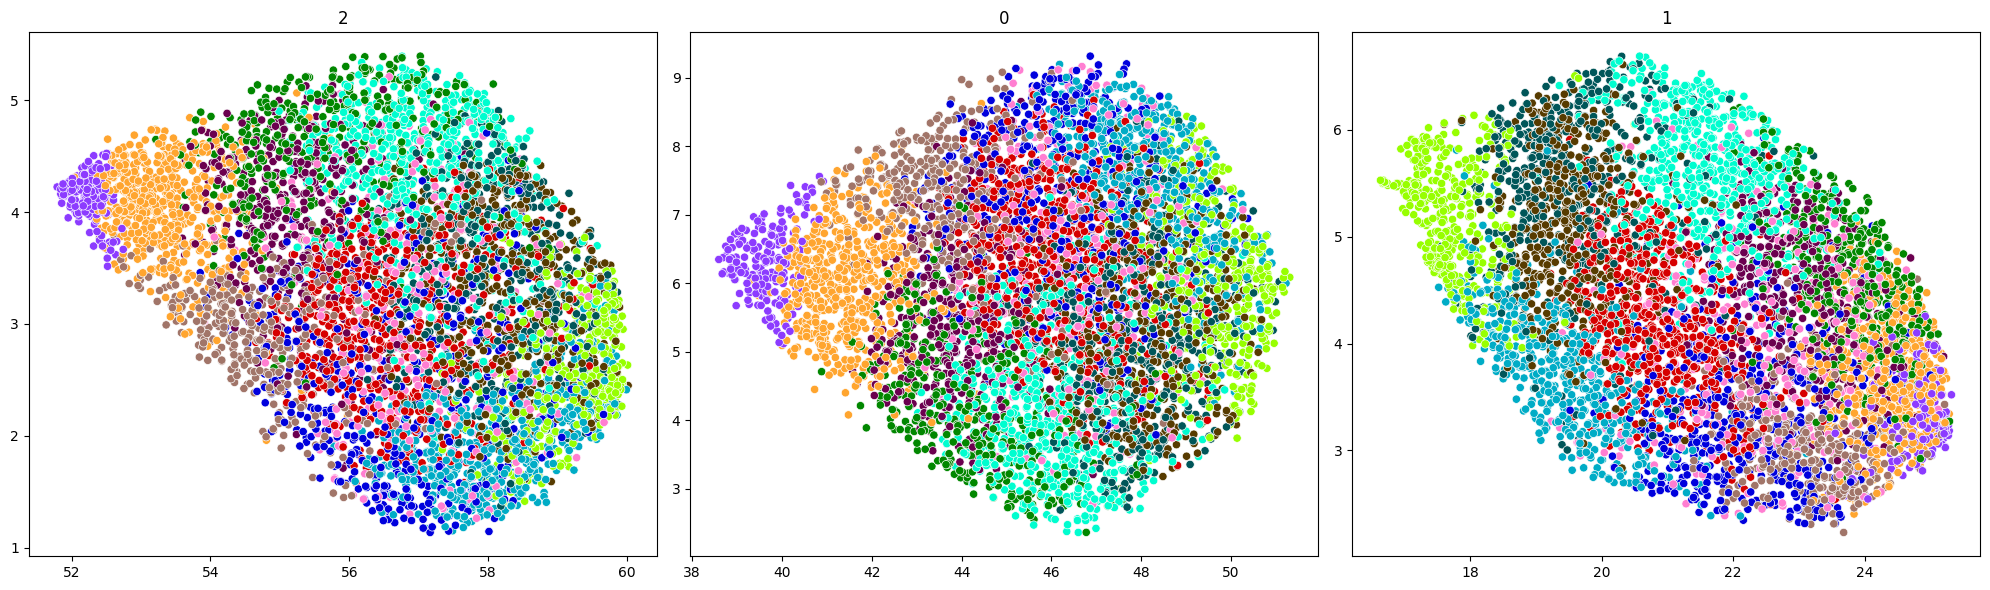

In [31]:
plt.figure(figsize=(20,6))
for i in range(3):
    
    id = results_both_df.index[i]
    em = results_both[id]['embedding']

    plt.subplot(1, 3, i+1)
    sns.scatterplot(
    x=em[:, 0],
    y=em[:, 1],
    # c=[sns.color_palette()[x] for x in hdb.labels_],
    palette = sns.color_palette(cc.glasbey, n_colors=max(tessa_clusters.cluster)+1),
    # hue=hdb.labels_,
    hue=tessa_clusters.cluster,
    data=em,
    legend=None
    )
#     plt.xlabel('UMAP embedding dimension 0')
#     plt.ylabel('UMAP embedding dimension 1')
    plt.title(id)
plt.tight_layout()
    

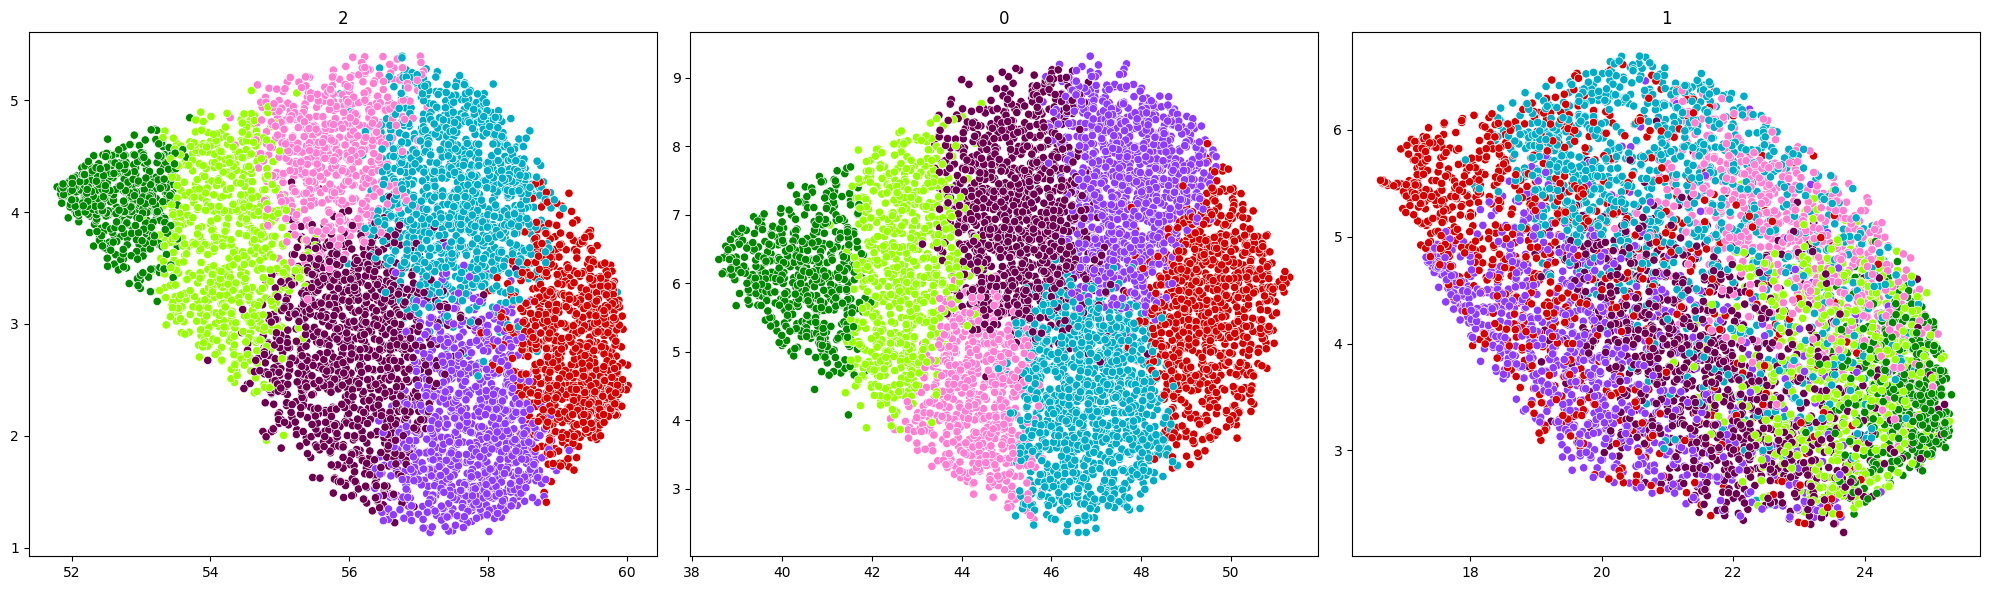

In [42]:
plt.figure(figsize=(20,6))
for i in range(3):
    
    id = results_both_df.index[i]
    em = results_both[id]['embedding']

    plt.subplot(1, 3, i+1)
    sns.scatterplot(
    x=em[:, 0],
    y=em[:, 1],
    # c=[sns.color_palette()[x] for x in hdb.labels_],
    palette = sns.color_palette(cc.glasbey, n_colors=max(chris_clusters.cluster)+1),
    # hue=hdb.labels_,
    hue=chris_clusters.cluster,
    data=em,
    legend=None
    )
#     plt.xlabel('UMAP embedding dimension 0')
#     plt.ylabel('UMAP embedding dimension 1')
    plt.title(id)
plt.tight_layout()
    

In [237]:
em[leo_clusters.cluster!=-1, :]

array([[ 6.99839325e+01,  6.39563948e-02],
       [ 6.80785217e+01,  1.09034538e+00],
       [ 7.08831711e+01, -4.90380883e-01],
       ...,
       [ 6.74092560e+01,  5.49084902e-01],
       [ 7.30754318e+01, -7.01653838e-01],
       [ 6.94361038e+01,  1.77572334e+00]])

/tmp/ipykernel_17380/1634679996.py:9: UserWarning: 
The palette list has fewer values (16) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_17380/1634679996.py:9: UserWarning: 
The palette list has fewer values (16) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_17380/1634679996.py:9: UserWarning: 
The palette list has fewer values (16) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


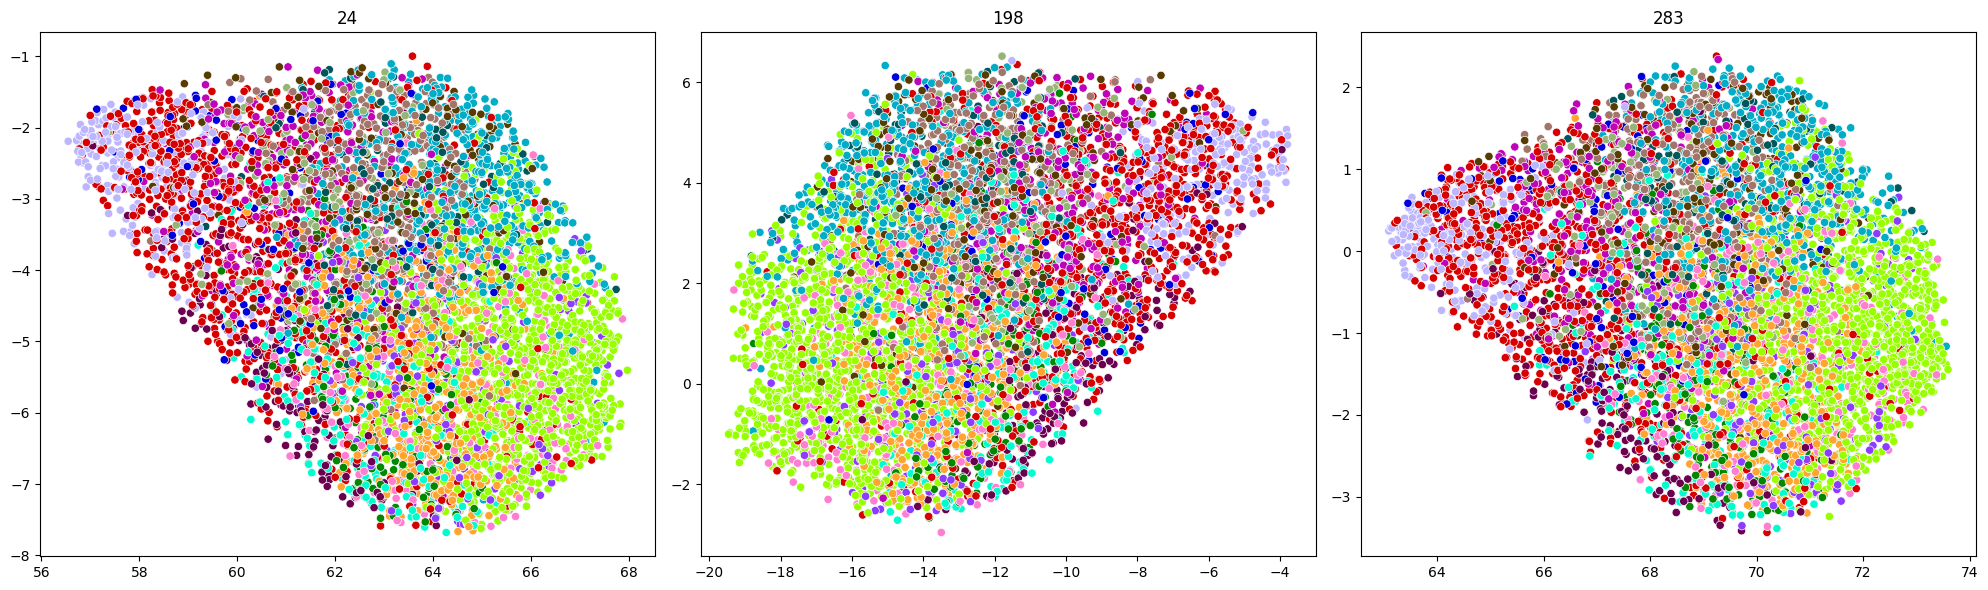

In [239]:
plt.figure(figsize=(20,6))
for i in range(3):
    
    id = results_both_df.index[i]
    em = results_both[id]['embedding']
    clusters = leo_clusters.cluster

    plt.subplot(1, 3, i+1)
    sns.scatterplot(
    x=em[:, 0],
    y=em[:, 1],
    # c=[sns.color_palette()[x] for x in hdb.labels_],
    palette = sns.color_palette(cc.glasbey, n_colors=max(clusters)+1),
    # hue=hdb.labels_,
    hue=clusters,
    data=em,
    legend=None
    )
#     plt.xlabel('UMAP embedding dimension 0')
#     plt.ylabel('UMAP embedding dimension 1')
    plt.title(id)
plt.tight_layout()
    